In [285]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.power import tt_ind_solve_power
import scipy.stats as ss
import statsmodels.stats.weightstats as ws
from math import ceil
import warnings
warnings.filterwarnings('ignore')

boston = datasets.load_boston()

x = boston.data
y = boston.target

In [286]:
target_df = pd.DataFrame(y)
df = pd.DataFrame(x)
target_df.rename(columns={0:'MEDV'}, inplace=True)
df.rename(columns={0:'CRIM', 1: 'ZN', 2: 'INDUS', 3: 'CHAS', 4: 'NOX', 5: 'RM', 6: 'AGE', 7: 'DIS', 8: 'RAD', 9: 'TAX', 10: 'PTRATIO', 11: 'B', 12: 'LSTAT'}, inplace=True)
df = df.merge(target_df, left_index=True, right_index=True)

In [287]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Part 1
Choose a variable (other than CHAS and MEDV)

The chosen variable is PTRATIO (pupil-teacher ratio per town)

1. Compute the mean and standard dev of PTRATIO

In [288]:
mean = round(df['PTRATIO'].mean(), 3)
std = round(df['PTRATIO'].std(), 3)

print(f"The average pupil-teacher ratio = {mean}")
print(f"The standard deviation of pupil-teacher ratio = {std}")

The average pupil-teacher ratio = 18.456
The standard deviation of pupil-teacher ratio = 2.165


2. Plot a histogram of PTRATIO

Text(0.5, 1.0, 'Frequency of Pupil to Teacher Ratio per Town')

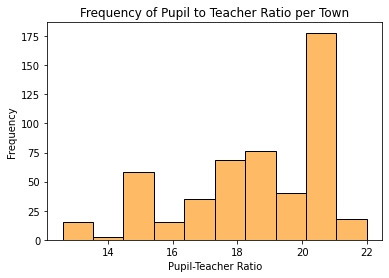

In [289]:
sns.histplot(data=df, x=df['PTRATIO'], color='darkorange', alpha=0.6, bins=10)
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.title("Frequency of Pupil to Teacher Ratio per Town")

3. What is the sample correlation between PTRATIO and MEDV?

In [290]:
corr = df['MEDV'].corr(df['PTRATIO']).round(3)
print(f"The correlation between median home price and pupil-teacher ratio = {corr}")

The correlation between median home price and pupil-teacher ratio = -0.508


4. Perform a regression, predicting MEDV from PTRATIO

In [291]:
predictors = sm.add_constant(data=df.PTRATIO, prepend=False)

lm_mod = sm.OLS(df.MEDV, predictors)
res = lm_mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Thu, 05 May 2022   Prob (F-statistic):           1.61e-34
Time:                        10:52:47   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PTRATIO       -2.1572      0.163    -13.233      0.0

The regression equation is : MEDV' = 62.345 - 2.157(PTRATIO)

Text(0.5, 1.0, 'Median Home Price with Pupil-Teacher Ratio with Regression Line')

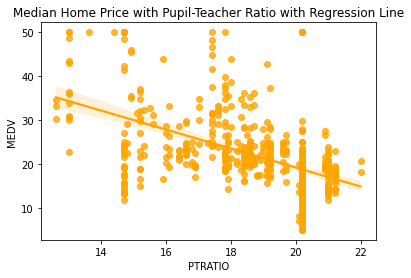

In [292]:
sns.regplot(x="PTRATIO", y="MEDV", data=df, color='orange')
plt.title("Median Home Price with Pupil-Teacher Ratio with Regression Line")

As the Pupil-Teacher ratio increases, the median home price decreases. A higher PTRATIO indicates that there are fewer teachers per student in the area, which could be an indication of lower funding for public education. Every 2.16 points that PTRATIO increases, median home price decreases by a point. These results are statistically significant and be unlikely due to random chance if the null hypothesis (PTRATIO does not influence MEDV) were true (F-statistic = 175.1, p-value < .001).

# Part 2
I have a theory that tracts that border the Charles River will have a higher median price than those that do not.

1. What is the null hypothesis?

The null hypothesis is that, within the population, the average price of homes that fall within a tract that borders the Charles River is the same as the average price of homes that do not.

2. Calculate the p-value
3. Calculate the 90% confidence level

In [293]:
def t_test_two_samp(a, b, alpha, alternative='two-sided'):
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['Mean0', 'Mean1', 'DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low90CI', 'High90CI']
    return pd.Series([a.mean(), b.mean(), degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
   

test = t_test_two_samp(df.loc[df.CHAS == 0.0, 'MEDV'], df.loc[df.CHAS == 1.0, 'MEDV'], 0.1)
test

Mean0         22.093843
Mean1         28.440000
DegFreedom    36.876409
Difference    -6.346157
Statistic     -3.996437
PValue         0.000074
Low90CI       -9.785438
High90CI      -2.906876
dtype: float64

4. Assume an effect size of 0.6, what group size is necessary for 80% power?

In [294]:
size = ceil(tt_ind_solve_power(effect_size=0.6, nobs1=None, power=0.8, alpha=0.5, ratio=1, alternative='two-sided'))

print(f"For an effect size of 60% and power of 80%, a group size of {size} is required")

For an effect size of 60% and power of 80%, a group size of 12 is required


Tracts that border the Charles river have a higher average housing price than those that don't by approximately $6,000. It can be stated with 90% confidence that the actual difference in the population is somewhere between $9,800 and $2,900. This difference is statistically significant and unlikely to be due to random chance (p-value < .001).

In [295]:
# drop target data from df to create full regression model
df.drop(['MEDV'], axis=1, inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
